In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set publication-quality parameters
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['font.family'] = 'sans-serif'

In [2]:
# =============================
# 1. Define RAGAS Results Structure
# =============================
# ADD YOUR RAGAS RESULTS HERE
# Format: ragas_results[model][hop] = {'metric': value, ...}

ragas_results = {
    "LLama-3B": {
        "1hop": {'answer_correctness': 0.5430, 'answer_relevancy': 0.8899, 'answer_similarity': 0.9122, 'faithfulness': 0.9001, 'context_precision': 0.6920, 'context_recall': 0.4550},
        "2hop": {'answer_correctness': 0.5482, 'answer_relevancy': 0.9032, 'answer_similarity': 0.9231, 'faithfulness': 0.8576, 'context_precision': 0.8900, 'context_recall': 0.5020},
    },
    "SmolLM3-3B": {
        "1hop": {'answer_correctness': 0.5441, 'answer_relevancy': 0.9223, 'answer_similarity': 0.9143, 'faithfulness': 0.9141, 'context_precision': 0.7280, 'context_recall': 0.5110},
        "2hop": {'answer_correctness': 0.5814, 'answer_relevancy': 0.9460, 'answer_similarity': 0.9275, 'faithfulness': 0.8661, 'context_precision': 0.9439, 'context_recall': 0.5431},
    },
    "Qwen3-3B": {
        "1hop": {'answer_correctness': 0.5749, 'answer_relevancy': 0.9146, 'answer_similarity': 0.9145, 'faithfulness': 0.9529, 'context_precision': 0.7780, 'context_recall': 0.6230},
        "2hop": {'answer_correctness': 0.6275, 'answer_relevancy': 0.9400, 'answer_similarity': 0.9257, 'faithfulness': 0.9329, 'context_precision': 0.9395, 'context_recall': 0.7440},
    },
    "LLama-8B": {
        "1hop": {'answer_correctness': 0.5779, 'answer_relevancy': 0.8930, 'answer_similarity': 0.9137, 'faithfulness': 0.9374, 'context_precision': 0.7360, 'context_recall': 0.4740},
        "2hop": {'answer_correctness': 0.5964, 'answer_relevancy': 0.9170, 'answer_similarity': 0.9262, 'faithfulness': 0.9294, 'context_precision': 0.9280, 'context_recall': 0.4770},
    },
    "Mistral-7B": {
        "1hop": {'answer_correctness': 0.5324, 'answer_relevancy': 0.8818, 'answer_similarity': 0.9059, 'faithfulness': 0.9324, 'context_precision': 0.7460, 'context_recall': 0.5070},
        "2hop": {'answer_correctness': 0.5712, 'answer_relevancy': 0.9196, 'answer_similarity': 0.9109, 'faithfulness': 0.9028, 'context_precision': 0.9260, 'context_recall': 0.5150},
    },
    "Mistral-8x7B": {
        "1hop": {'answer_correctness': 0.5198, 'answer_relevancy': 0.8394, 'answer_similarity': 0.8997, 'faithfulness': 0.8878, 'context_precision': 0.7400, 'context_recall': 0.4610},
        "2hop": {'answer_correctness': 0.5491, 'answer_relevancy': 0.7814, 'answer_similarity': 0.9076, 'faithfulness': 0.8511, 'context_precision': 0.9340, 'context_recall': 0.4960},
    },
    "LLama-70B": {
        "1hop": {'answer_correctness': 0.5900, 'answer_relevancy': 0.8701, 'answer_similarity': 0.9107, 'faithfulness': 0.9618, 'context_precision': 0.7460, 'context_recall': 0.4620},
        "2hop": {'answer_correctness': 0.6451, 'answer_relevancy': 0.9057, 'answer_similarity': 0.9233, 'faithfulness': 0.9492, 'context_precision': 0.9520, 'context_recall': 0.5200},
    },
    "GPT-5-mini": {
        "1hop": {'answer_correctness': 0.5253, 'answer_relevancy': 0.9038, 'answer_similarity': 0.9149, 'faithfulness': 0.9678, 'context_precision': 0.7960, 'context_recall': 0.6420},
        "2hop": {'answer_correctness': 0.5590, 'answer_relevancy': 0.9351, 'answer_similarity': 0.9245, 'faithfulness': 0.9275, 'context_precision': 0.9740, 'context_recall': 0.7580},
    },
}

# Define metrics of interest
metrics_of_interest = ['faithfulness', 'answer_relevancy', 'answer_similarity', 'context_recall']
models = list(ragas_results.keys())

In [3]:
data_list = []
for model in models:
    for hop in ['1hop', '2hop']:
        for metric in metrics_of_interest:
            data_list.append({
                'model': model,
                'hop': hop,
                'metric': metric,
                'score': ragas_results[model][hop].get(metric, 0.0)
            })

df = pd.DataFrame(data_list)

Generating RAGAS Evaluation Heatmap for 1-hop...


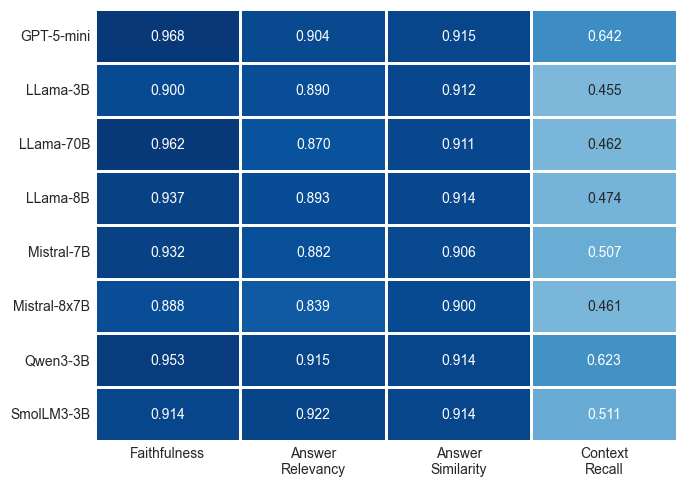

Generating RAGAS Evaluation Heatmap for 2-hop...


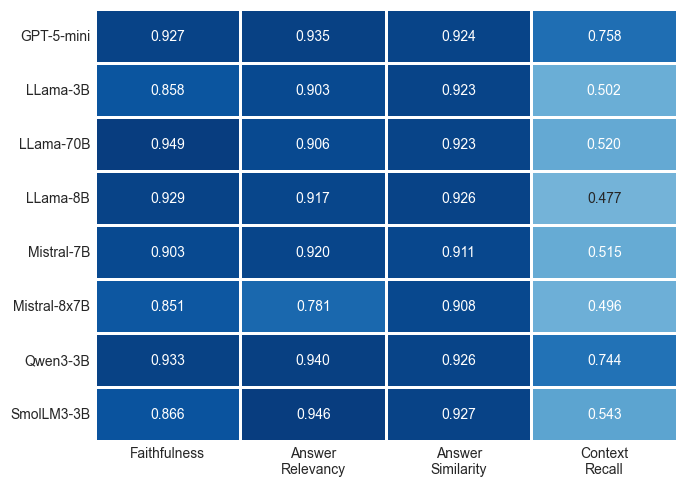

In [4]:
for hop in ['1hop', '2hop']:
    print(f"Generating RAGAS Evaluation Heatmap for {hop.replace('hop', '-hop')}...")
    
    # Create figure with balanced proportions
    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    
    # Prepare data for this hop
    hop_data = df[df['hop'] == hop]
    pivot_data = hop_data.pivot(index='model', columns='metric', values='score')
    
    # Reorder columns to match our metrics of interest
    pivot_data = pivot_data[metrics_of_interest]
    
    # Create heatmap with professional styling
    sns.heatmap(pivot_data,
                annot=True,
                fmt='.3f',
                cmap='Blues',
                vmin=0,
                vmax=1,
                cbar=False,
                ax=ax,
                linewidths=1,
                linecolor='white',
                square=False,
                annot_kws={'fontsize': 10})
    
    # Set title
    # ax.set_title(f'RAGAS Evaluation: {hop.replace("hop", "-hop")} Questions', fontsize=12, pad=10)
    
    # Remove axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Set tick labels
    ax.set_xticklabels(['Faithfulness', 'Answer\nRelevancy', 'Answer\nSimilarity', 'Context\nRecall'],
                       rotation=0, ha='center', fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    
    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(f'ragas_evaluation_{hop}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'ragas_evaluation_{hop}.pdf', dpi=300, bbox_inches='tight')
    plt.show()

Generating RAGAS Evaluation Heatmaps...


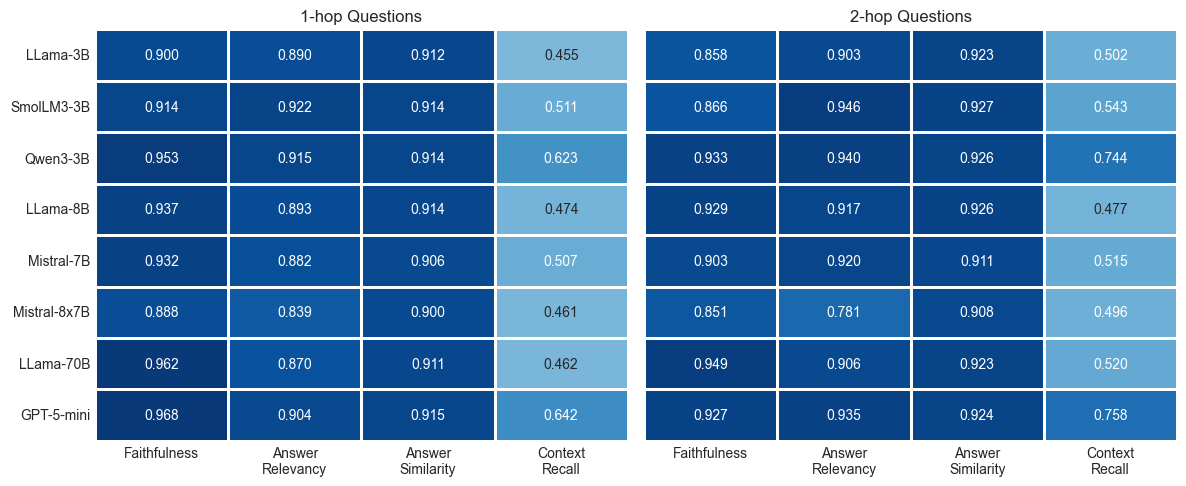

In [8]:
print("Generating RAGAS Evaluation Heatmaps...")

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# fig.suptitle('RAGAS Evaluation: Model Performance Across Reasoning Depths', fontsize=14, y=1.02)

# Create heatmaps for each hop
for idx, hop in enumerate(['1hop', '2hop']):
    ax = axes[idx]
    
    # Prepare data for this hop
    hop_data = df[df['hop'] == hop]
    pivot_data = hop_data.pivot(index='model', columns='metric', values='score')
    pivot_data = pivot_data.loc[models, metrics_of_interest]

    
    # Reorder columns to match our metrics of interest
    pivot_data = pivot_data[metrics_of_interest]
    
    # Create heatmap with professional styling
    sns.heatmap(pivot_data,
                annot=True,
                fmt='.3f',
                cmap='Blues',
                vmin=0,
                vmax=1,
                cbar=False,
                ax=ax,
                linewidths=1,
                linecolor='white',
                square=False,
                annot_kws={'fontsize': 10})
    
    # Set subtitle for each heatmap
    ax.set_title(f'{hop.replace("hop", "-hop")} Questions', fontsize=12)
    
    # Remove axis labels
    ax.set_xlabel('')
    
    if idx == 0:
        ax.set_ylabel('')
        # Keep y-labels only on the first plot
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    else:
        ax.set_ylabel('')
        ax.set_yticklabels([])  # Remove y-labels on second plot
    
    # Set x-tick labels
    ax.set_xticklabels(['Faithfulness', 'Answer\nRelevancy', 'Answer\nSimilarity', 'Context\nRecall'],
                       rotation=0, ha='center', fontsize=10)
    
    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('ragas_evaluation_combined.png', dpi=300, bbox_inches='tight')
plt.savefig('ragas_evaluation_combined.pdf', dpi=300, bbox_inches='tight')
plt.show()